In [8]:
import numpy as np
from matplotlib import pyplot as plt
import qutip as qutip

import time as time

import sys
import os
sys.path.append('../../../utils')

from tomography import coherent_state_tomography_copy as cst2
from quantum_utils import quantum_optics_utils as qou

In [9]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Define the noise state reconstruction POVM
mesh_size = 0.25
max_x = 5
thermal_reconstruction_dimension = 30
povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, mesh_size, thermal_reconstruction_dimension, cutoff=0)

# Define the thermal noise
thermal_photon_number = 2

# Generate the noise state
ideal_thermal_state = qutip.thermal_dm(thermal_reconstruction_dimension, thermal_photon_number)

Generating coherent state mesh took 10.585580110549927 s.


In [11]:
# Generate the noise Q function
noise_q_func = qutip.qfunc(ideal_thermal_state, xs, ps, g=2)

In [12]:
# Do noise state MLE
number_of_mle_iterations = 100
s = time.time()
reconstructed_noise_state, _ = \
    cst2.perform_coherent_state_MLE(
        povm,
        noise_q_func, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0,
        number_of_photons=1)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(thermal_reconstruction_dimension) + ': ' + str(e - s) + ' s')

Non-inlined, unflattened, untruncated coherent state MLE of 1 photon mode(s) and a Fock space  dimension of 30 took 47.098538875579834 seconds  for 100.
Time for MLE reconstruction for dim = 30: 47.09875512123108 s


In [13]:
print(qutip.fidelity(reconstructed_noise_state, ideal_thermal_state))

0.9992645216672096


In [14]:
# Use the reconstructed noise state to construct the new POVM elements
max_x = 2
mesh_size = 0.5
s = time.time()
noisy_povm, _, _, _ = cst2.generate_coherent_state_POVM(max_x, 
                                                        mesh_size, 
                                                        thermal_reconstruction_dimension,
                                                        cutoff=0,
                                                        noise_base=reconstructed_noise_state)
e = time.time()
print('Constructing noisy POVM took ' + str(e - s) + ' s')

Generating coherent state mesh took 0.5226271152496338 s.
Constructing noisy POVM took 0.5228478908538818 s


# Do noisy MLE without truncated dimension

In [54]:
# Define the target joint state and generate its histogram
q0 = qutip.basis(thermal_reconstruction_dimension, 0)
q1 = qutip.basis(thermal_reconstruction_dimension, 1)
bell00 = (qutip.tensor(q0, q0) + qutip.tensor(q1, q1)).unit()
rho_B00 = bell00 * bell00.dag()
s = time.time()
histogram_4D = qou.generate_joint_2_photon_quadrature_histogram(rho_B00,
                                                                thermal_reconstruction_dimension,
                                                                noisy_povm)
e = time.time()
print('Generating high dimensional histogram took ' + str(e - s) + ' s.')

Generating high dimensional histogram took 55.81901574134827 s.


In [ ]:
# Do the joint 2 photon tomography with the truncated states
number_of_mle_iterations = 1
s = time.time()
reconstructed_bell00_state, lls = \
    cst2.perform_coherent_state_MLE(
        noisy_povm,
        histogram_4D, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0,
        number_of_photons=2)
e = time.time()
print('Time for ' + str(number_of_mle_iterations) + ' iterations of MLE reconstruction for dim = ' + \
          str(truncated_dimension) + ': ' + str(e - s) + ' s')

Generating joint povm...


# Do noisy MLE with truncated dimension

In [55]:
# Truncate the noisy POVM
truncated_dimension = 3
truncated_noisy_povm = cst2.truncate_povm(noisy_povm, truncated_dimension)

In [56]:
# Define the target joint state and generate its histogram
q0 = qutip.basis(truncated_dimension, 0)
q1 = qutip.basis(truncated_dimension, 1)
bell00 = (qutip.tensor(q0, q0) + qutip.tensor(q1, q1)).unit()
rho_B00 = bell00 * bell00.dag()


In [67]:
# Do the joint 2 photon tomography with the truncated states
number_of_mle_iterations = 10000
reconstructed_bell00_state_trunc3, intermediate_fidelities = \
    cst2.perform_coherent_state_MLE(
        truncated_noisy_povm,
        histogram_4D, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0,
        number_of_photons=2,
        rho_ideal=rho_B00)

Generating joint povm...
Generating joint povm mesh took 0.36528992652893066 s.
Non-inlined, unflattened, untruncated coherent state MLE of 2 photon mode(s) and a Fock space  dimension of 3 took 179560.36910295486 seconds  for 10000.


<IPython.core.display.Javascript object>


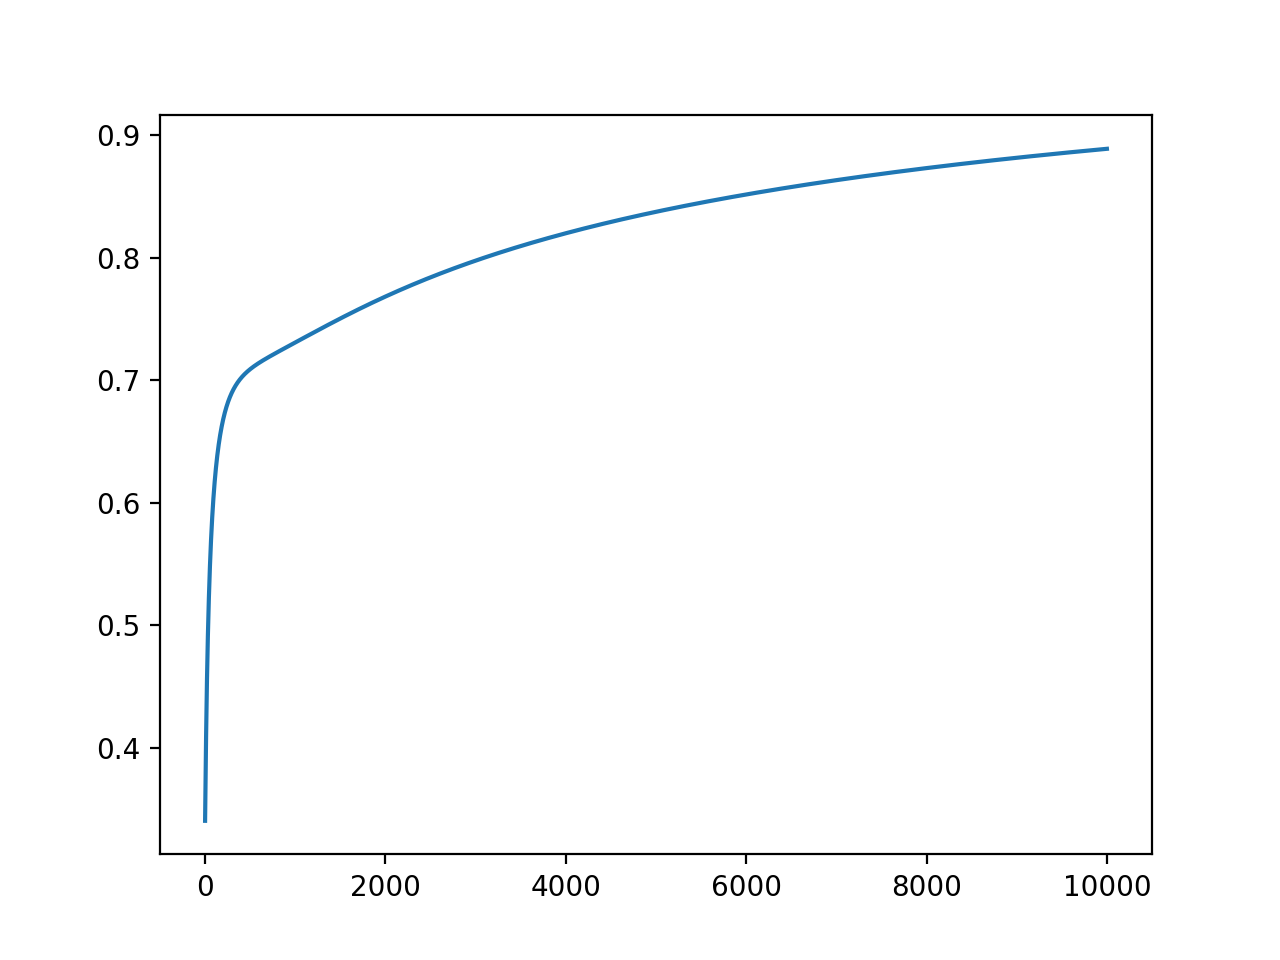

[0.34046506228671014, 0.3474753449900981, 0.35434904934529077, 0.3610750333468124, 0.36764549054303053, 0.37405539436341045, 0.38030200678353726, 0.38638441460408246, 0.3923031758636233, 0.3980600076588252, 0.403657523099512, 0.4090989902637162, 0.4143881926762218, 0.4195292579817696, 0.4245265534179867, 0.42938457014304865, 0.4341078844047637, 0.4387010734167393, 0.44316867620597467, 0.4475151515278474, 0.4517448850497473, 0.45586211573204916, 0.45987097466436505, 0.46377544654274394, 0.46757937612668615, 0.4712864548741123, 0.47490023195593084, 0.4784241105900549, 0.4818613577633299, 0.4852150984772179, 0.4884883112391431, 0.4916838535635588, 0.49480447007372275, 0.4978527585363678, 0.5008312209344523, 0.5037422404954174, 0.5065880995700788, 0.5093709756031009, 0.5120929548151714, 0.5147560347808794, 0.5173621210122883, 0.5199130429273068, 0.5224105411725988, 0.5248562992691006, 0.5272519144598813, 0.5295989226599219, 0.5318988128927917, 0.5341529824531842, 0.5363627903749425, 0.5385

In [68]:
fig, ax = plt.subplots()
ax.plot(intermediate_fidelities)
print(intermediate_fidelities)

<IPython.core.display.Javascript object>


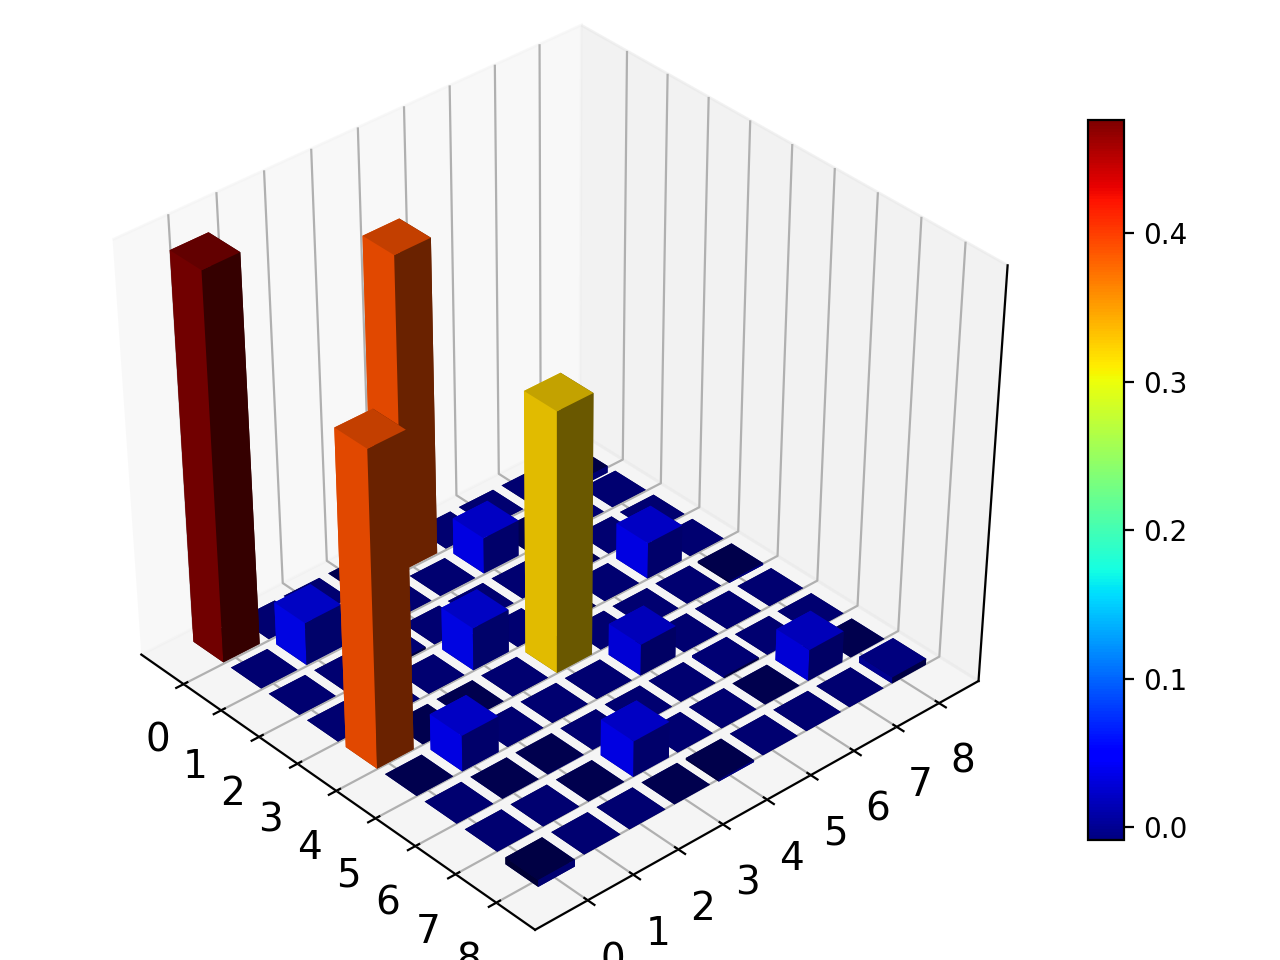

(<Figure size 640x480 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x14d1b7310>)

In [69]:
qutip.visualization.matrix_histogram(reconstructed_bell00_state_trunc3)

In [33]:
number_of_photons = 2
s = time.time()
flattened_povm = cst2.generate_joint_povm(truncated_noisy_povm, number_of_photons)
f_ijkl_flattened = [f_ijkl for chunk in histogram_4D for \
                    block in chunk for row in block for f_ijkl in row]
e = time.time()
print('Flattening POVM took ' + str(e - s) + ' s.')

Flattening POVM took 0.4661839008331299 s.


In [39]:
number_of_mle_iterations = 1000
s = time.time()
print('Calculating G_inv...')
G_inv = cst2.extract_G_inv_from_POVM(truncated_noisy_povm)
G_inv = qutip.tensor(G_inv, G_inv)
i = time.time()
print('Calculating G_inv took ' + str(i - s) + ' s.')
inline_reconstructed_B00_rho, _ = cst2.perform_coherent_state_MLE_inline(flattened_povm,
                                  f_ijkl_flattened, 
                                  G_inv,
                                  number_of_mle_iterations,
                                  frequency_threshold=0,
                                  data_threshold=0,
                                  cutoff=0)
e = time.time()
print('Coherent state MLE ' + str(e - s) + ' s.')

Calculating G_inv...
Calculating G_inv took 0.01613903045654297 s.
Inlined, flattened coherent state MLE of 1 photonic modes and truncated Fock space dimension 4 took 1632.4186170101166 seconds.
Coherent state MLE 1632.4352860450745 s.


<IPython.core.display.Javascript object>


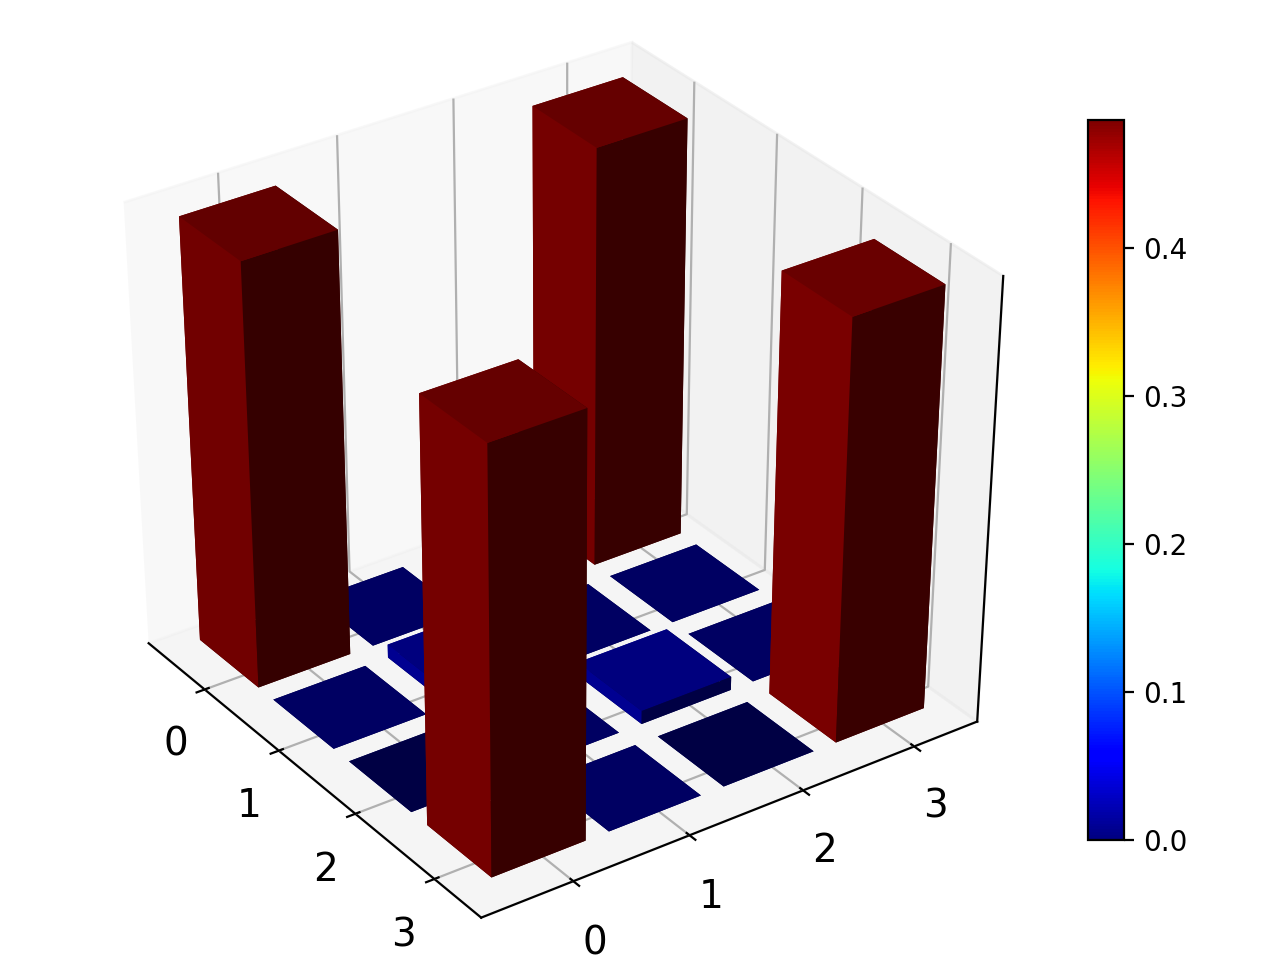

(<Figure size 640x480 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x13360e4d0>)

In [40]:
qutip.visualization.matrix_histogram(inline_reconstructed_B00_rho)

# Do the truncated MLE with a higher dimensional reconstruction space

In [53]:
number_of_photons = 2

# Truncate the noisy POVM
truncated_dimension = 4
truncated_noisy_povm = cst2.truncate_povm(noisy_povm, truncated_dimension)

s = time.time()
flattened_povm = cst2.generate_joint_povm(truncated_noisy_povm, number_of_photons)
f_ijkl_flattened = [f_ijkl for chunk in histogram_4D for \
                    block in chunk for row in block for f_ijkl in row]
e = time.time()
print('Flattening POVM took ' + str(e - s) + ' s.')

lerb


Exception: Operator and state do not have same tensor structure: [3] and [3, 3]

In [50]:
number_of_mle_iterations = 1000
s = time.time()
print('Calculating G_inv...')
G_inv = cst2.extract_G_inv_from_POVM(truncated_noisy_povm)
G_inv = qutip.tensor(G_inv, G_inv)
i = time.time()
print('Calculating G_inv took ' + str(i - s) + ' s.')
inline_reconstructed_B00_rho_3modes, _ = cst2.perform_coherent_state_MLE_inline(flattened_povm,
                                  f_ijkl_flattened, 
                                  G_inv,
                                  number_of_mle_iterations,
                                  frequency_threshold=0,
                                  data_threshold=0,
                                  cutoff=0)
e = time.time()
print('Coherent state MLE ' + str(e - s) + ' s.')

Calculating G_inv...
Calculating G_inv took 0.014698982238769531 s.
Inlined, flattened coherent state MLE of 1 photonic modes and truncated Fock space dimension 9 took 1425.4899418354034 seconds.
Coherent state MLE 1425.5051441192627 s.


<IPython.core.display.Javascript object>


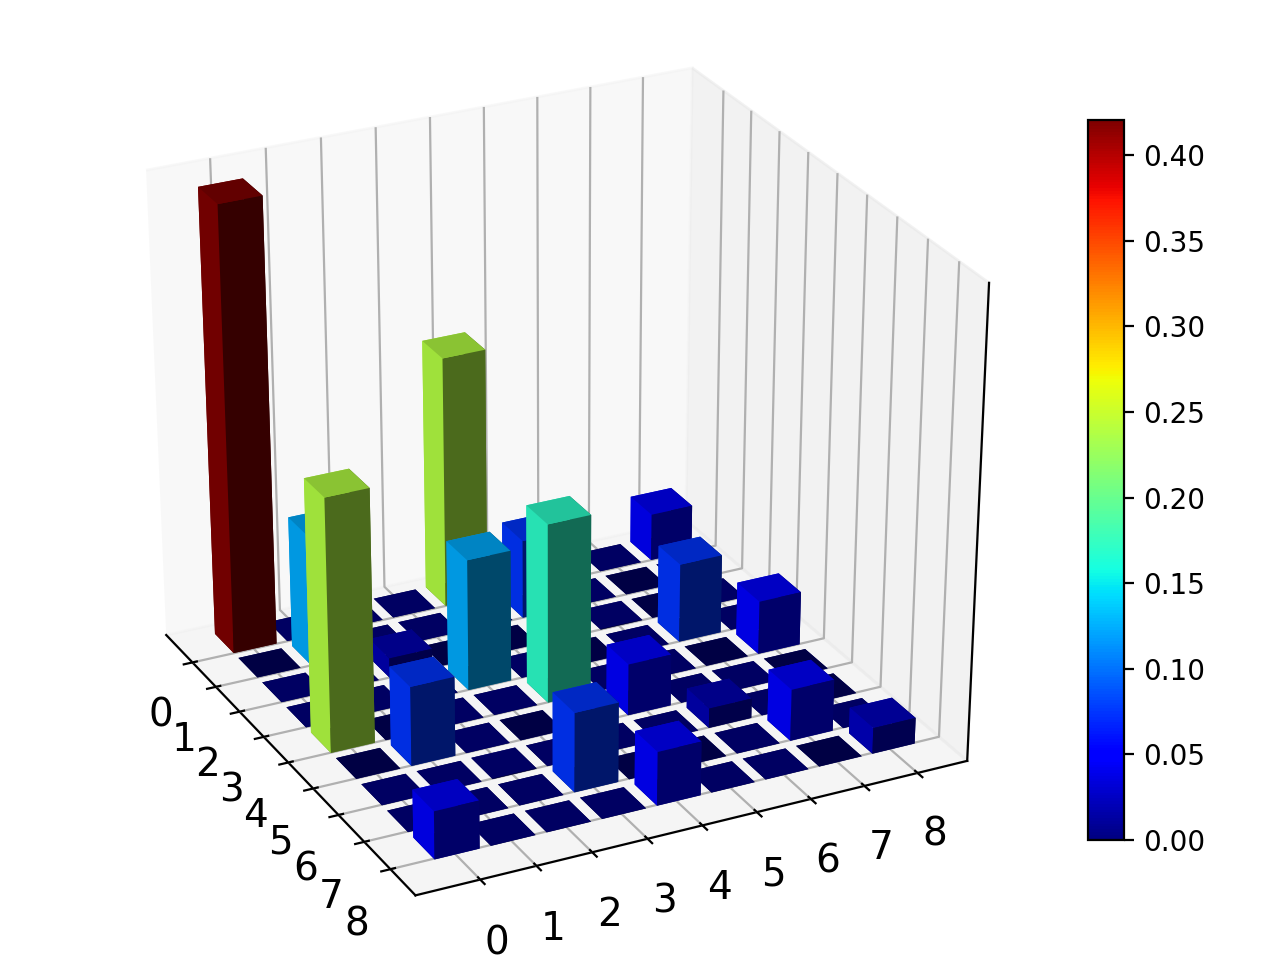

(<Figure size 640x480 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x14d0378d0>)

In [51]:
qutip.visualization.matrix_histogram(inline_reconstructed_B00_rho_3modes)

# Do MLE with thinned POVM

In [43]:
number_of_photons = 2
s = time.time()
flattened_povm = cst2.generate_joint_povm(truncated_noisy_povm, number_of_photons)
f_ijkl_flattened = [f_ijkl for chunk in histogram_4D for \
                    block in chunk for row in block for f_ijkl in row]
thinned_povm, thinned_f_ijkl = cst2.thin_povm(flattened_povm, f_ijkl_flattened, cutoff=10e-9)
e = time.time()
print('Flattening and thinning POVM took ' + str(e - s) + ' s.')

Flattening and thinning POVM took 0.510918140411377 s.


In [44]:
number_of_mle_iterations = 100
s = time.time()
print('Calculating G_inv...')
G_inv = cst2.extract_G_inv_from_POVM(truncated_noisy_povm)
G_inv = qutip.tensor(G_inv, G_inv)
i = time.time()
print('Calculating G_inv took ' + str(i - s) + ' s.')
cst2.perform_coherent_state_MLE_inline(thinned_povm,
                                  thinned_f_ijkl, 
                                  G_inv,
                                  number_of_mle_iterations,
                                  frequency_threshold=0,
                                  data_threshold=0,
                                  cutoff=0)
e = time.time()
print('Coherent state MLE ' + str(e - s) + ' s.')

Calculating G_inv...
Calculating G_inv took 0.011317014694213867 s.
Coherent state MLE 5.742070913314819 s.


In [45]:
print(len(thinned_povm))
print(len(flattened_povm))

6481
6561


In [ ]:
qutip.visualization.